In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

file_path = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/movies_metadata.csv"

metadata = pd.read_csv(file_path)

metadata.head(5)

C:\Users\WD\AppData\Local\Temp\ipykernel_19052\133086983.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(file_path)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Aplicar NLP

# keywords

In [3]:
file_path_keywords = "https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Proyecto/data/keywords.csv"

df_keywords = pd.read_csv(file_path_keywords)

df_keywords.head(5)


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [4]:
import ast

df_keywords['keywords'] = df_keywords['keywords'].apply(ast.literal_eval)
df_keywords_exploded = df_keywords.explode('keywords')

df_keywords_exploded['keyword_id'] = df_keywords_exploded['keywords'].apply(lambda x: x['id'] if isinstance(x, dict) else None)
df_keywords_exploded['keyword_name'] = df_keywords_exploded['keywords'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

# Eliminar la columna original 'keywords'
df_keywords_exploded = df_keywords_exploded.drop(columns=['keywords'])

print(df_keywords_exploded.head(10))

     id  keyword_id       keyword_name
0   862       931.0           jealousy
0   862      4290.0                toy
0   862      5202.0                boy
0   862      6054.0         friendship
0   862      9713.0            friends
0   862      9823.0            rivalry
0   862    165503.0      boy next door
0   862    170722.0            new toy
0   862    187065.0  toy comes to life
1  8844     10090.0         board game


C:\Users\WD\AppData\Local\Temp\ipykernel_19052\2527624896.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='movie_count', y='keyword_name', data=top_25_keywords, palette='viridis')


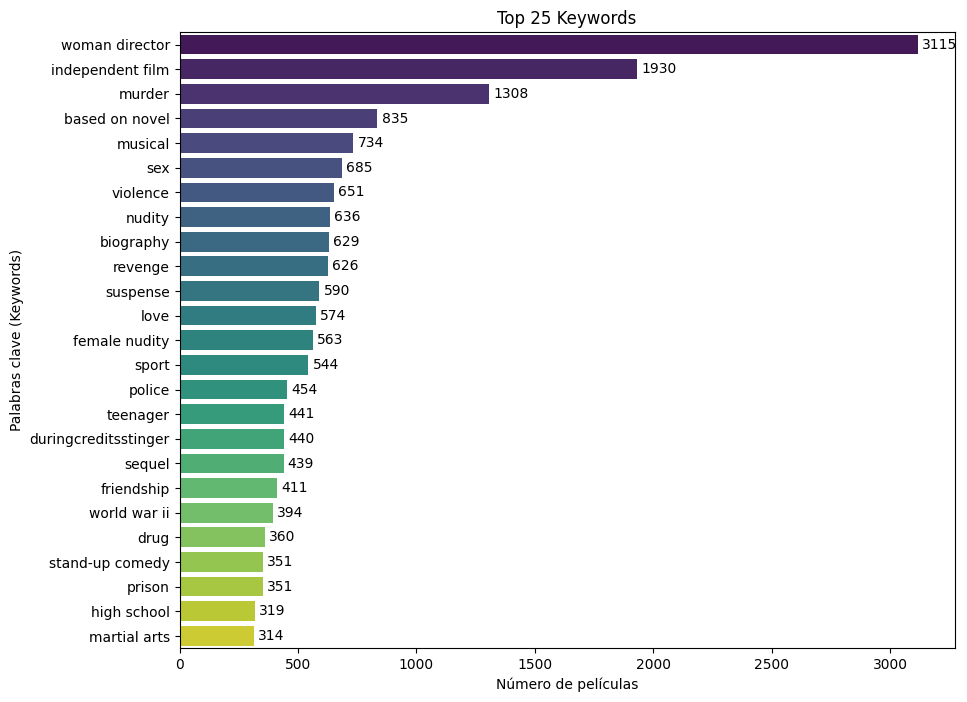

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

keyword_counts = df_keywords_exploded.groupby('keyword_name')['id'].count().reset_index(name='movie_count')
keyword_counts = keyword_counts.sort_values('movie_count', ascending=False)
top_25_keywords = keyword_counts.head(25)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='movie_count', y='keyword_name', data=top_25_keywords, palette='viridis')

# Agregar etiquetas de datos
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge', padding=3)

plt.xlabel('Número de películas')
plt.ylabel('Palabras clave (Keywords)')
plt.title('Top 25 Keywords')
plt.show()

In [6]:
df_keywords_exploded.head()

,id,keyword_id,keyword_name
0,862,931.0,jealousy
0,862,4290.0,toy
0,862,5202.0,boy
0,862,6054.0,friendship
0,862,9713.0,friends


In [7]:
df_grouped_keywords = df_keywords_exploded.groupby('id')['keyword_name'].apply(list).reset_index()

print(df_grouped_keywords.head())

   id                                       keyword_name
0   2  [underdog, prison, factory worker, prisoner, h...
1   3  [salesclerk, helsinki, garbage, independent film]
2   5  [hotel, new year's eve, witch, bet, hotel room...
3   6  [chicago, drug dealer, boxing match, escape, o...
4  11  [android, galaxy, hermit, death star, lightsab...


In [422]:
#!python -m spacy download en_core_web_sm

In [8]:
df_grouped_keywords['id'] = df_grouped_keywords['id'].astype(str)
df_keywords_title = pd.merge(df_grouped_keywords, metadata[['id', 'original_title']], on='id', how='left')
df_keywords_title = df_keywords_title[['id', 'original_title', 'keyword_name']]
print(df_keywords_title.head())

   id        original_title                                       keyword_name
0   2                 Ariel  [underdog, prison, factory worker, prisoner, h...
1   3  Varjoja paratiisissa  [salesclerk, helsinki, garbage, independent film]
2   5            Four Rooms  [hotel, new year's eve, witch, bet, hotel room...
3   6        Judgment Night  [chicago, drug dealer, boxing match, escape, o...
4  11             Star Wars  [android, galaxy, hermit, death star, lightsab...


In [9]:
import re
import spacy
import unidecode
from nltk.stem import SnowballStemmer

nlp = spacy.load('en_core_web_sm')
stemmer = SnowballStemmer('english')

def text_cleaning(txt, apply_lemma=True, apply_stemming=True):
    if not txt or pd.isna(txt):
        return ""
    
    out = unidecode.unidecode(txt)
    out = re.sub('[^A-Za-z0-9 ]+', ' ', out)
    out = re.sub("\d+", "", out)
    out = re.sub('\s+', ' ', out).strip()
    out = out.lower()

    lemmas = out.split()

    if apply_stemming:
        stemmed = [stemmer.stem(lemma) for lemma in lemmas]
    else:
        stemmed = lemmas

    cleaned = [word for word in stemmed if len(word) > 2]

    return " ".join(cleaned) if cleaned else ""



In [10]:
df_keywords_title['cleaned_keywords'] = df_keywords_title['keyword_name'].apply(
    lambda keywords: [text_cleaning(kw) for kw in keywords if kw]
)
print(df_keywords_title[['id', 'cleaned_keywords']].head())

   id                                   cleaned_keywords
0   2  [underdog, prison, factori worker, prison, hel...
1   3      [salesclerk, helsinki, garbag, independ film]
2   5  [hotel, new year eve, witch, bet, hotel room, ...
3   6  [chicago, drug dealer, box match, escap, one n...
4  11  [android, galaxi, hermit, death star, lightsab...


In [11]:
df_keywords_title.head()

,id,original_title,keyword_name,cleaned_keywords
0,2,Ariel,"[underdog, prison, factory worker, prisoner, h...","[underdog, prison, factori worker, prison, hel..."
1,3,Varjoja paratiisissa,"[salesclerk, helsinki, garbage, independent film]","[salesclerk, helsinki, garbag, independ film]"
2,5,Four Rooms,"[hotel, new year's eve, witch, bet, hotel room...","[hotel, new year eve, witch, bet, hotel room, ..."
3,6,Judgment Night,"[chicago, drug dealer, boxing match, escape, o...","[chicago, drug dealer, box match, escap, one n..."
4,11,Star Wars,"[android, galaxy, hermit, death star, lightsab...","[android, galaxi, hermit, death star, lightsab..."


In [13]:
df_keywords_title[df_keywords_title['id']=='862']["cleaned_keywords"]

682    [jealousi, toy, boy, friendship, friend, rival...
Name: cleaned_keywords, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

clean_keywords = df_keywords_title["cleaned_keywords"].apply(lambda x: " ".join(x))
count = CountVectorizer()
count_matrix = count.fit_transform(clean_keywords)

print(count_matrix.shape)
print(len(df_keywords_title))

(45462, 10689)
45462


In [15]:
clean_keywords=df_keywords_title["cleaned_keywords"]

clean_sentences= [" ".join(i) for i in clean_keywords]

type(clean_sentences)

list

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count=CountVectorizer()
count_matrix=count.fit_transform(clean_sentences)
count_matrix

<45462x10689 sparse matrix of type '<class 'numpy.int64'>'
	with 211699 stored elements in Compressed Sparse Row format>

In [17]:
print(count_matrix.shape)
print(len(df_keywords_title))


(45462, 10689)
45462


In [18]:
print(df_keywords_title['id'].is_unique)

False


In [19]:
df_count_matrix = pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names_out(), index=df_keywords_title.index)

# Ver las primeras filas del DataFrame resultante
print(df_count_matrix.head())

MemoryError: Unable to allocate 3.62 GiB for an array with shape (45462, 10689) and data type int64

In [362]:
df_count_matrix.index[862]

'1294'

In [361]:
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la matriz de similitud de coseno
cosine_sim_count = cosine_similarity(count_matrix, count_matrix)
cosine_sim_count

MemoryError: Unable to allocate 15.4 GiB for an array with shape (45462, 45462) and data type float64

In [174]:
def recomendador_coseno(movie_id, cosine_sim, df=df_keywords_title):
    # Crear una Serie que contiene como índice el 'id' y el valor correspondiente al índice de la película
    indices = pd.Series(df.index, index=df['id'])

    # Verificar si el movie_id está en los índices
    if movie_id not in indices.index:
        print(f'ID de película {movie_id} no encontrado.')
        return

    # Obtener el índice de la película a partir del movie_id
    idx = indices[movie_id]

    # Obtener el título de la película original
    original_title = df.loc[idx, 'original_title']
    print(f'Título de la película original: {original_title}')
    print(f'Índice de la película: {idx}')

    # Obtener la similitud de coseno para esa película en particular con todas las películas
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar la lista de tuplas por la similitud de coseno en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener las 5 películas más similares ignorando el primero (que es la misma película)
    sim_scores = sim_scores[1:6]

    # Obtener los índices y las similitudes
    movie_indices = [i[0] for i in sim_scores]
    sim_scores_values = [i[1] for i in sim_scores]

    # Crear un DataFrame para mostrar los resultados
    result_df = pd.DataFrame({
        'Índice': movie_indices,
        'Título': df['original_title'].iloc[movie_indices].values,
        'Similitud Coseno': sim_scores_values
    })

    # Imprimir las películas recomendadas con sus índices y similitudes
    print('\nPelículas recomendadas:')
    print(result_df)

    # Retornar el DataFrame con los resultados
    return result_df

In [178]:
recomendador_coseno('862', cosine_sim_count)

Título de la película original: Toy Story
Índice de la película: 682

Películas recomendadas:
   Índice                           Título  Similitud Coseno
0    5005                   Small Soldiers          0.596962
1    4722                   Child's Play 2          0.568535
2   38815       Toy Story That Time Forgot          0.522233
3    3946                      Toy Story 3          0.497796
4   10264  Barbie and the Three Musketeers          0.452267


,Índice,Título,Similitud Coseno
0,5005,Small Soldiers,0.596962
1,4722,Child's Play 2,0.568535
2,38815,Toy Story That Time Forgot,0.522233
3,3946,Toy Story 3,0.497796
4,10264,Barbie and the Three Musketeers,0.452267
